<a href="https://colab.research.google.com/github/reynahharo-ui/Curso_Python_PROINNOVA/blob/main/Prediccion_de_salarios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####**Proyecto 4.** Predicción de salarios
01 de noviembre de 2025

*Curso PROINNOVA* "Análisis y visualización de datos con Python en la nube"

*Participante:* **Reyna Guadalupe Leticia Hernández Haro**

Centro Universitario de Ciencias Sociales y Humanidades. Departamento de Letras

In [1]:
import datetime
#Hora(Tiempo universal coordinado, UTC) y fecha
now=datetime.datetime.now()
print(f"Fecha y hora(UTC):{now.strftime('%Y-%m-%d%H:%M')}")

Fecha y hora(UTC):2025-11-0201:11


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

# Ruta al archivo en su Google Drive
ruta_archivo = '/content/drive/MyDrive/Colab Data-RHH/proyecto4.csv'

# Leer un archivo con datos separados por espacio
df = pd.read_csv(ruta_archivo)

# presentar el contenido de primeras líneas de DataFrame
display(df)

,rating,salary,draft_round,age,experience,bmi
0,97,37440000,1,36,17,26.72
1,97,32740000,1,29,9,25.27
2,96,25840000,1,26,7,24.66
3,96,37200000,1,32,13,24.11
4,96,38200000,1,31,11,25.98
...,...,...,...,...,...,...
434,95,40920000,1,33,14,24.11
435,95,35360000,1,28,9,23.28
436,94,10170000,1,22,3,25.49
437,94,39340000,1,31,9,25.04


,rating,salary,draft_round,age,experience,bmi
rating,1.000000,0.810253,0.008064,0.292463,0.416545,0.077374
salary,0.810253,1.000000,0.003895,0.442704,0.532051,0.037066
draft_round,0.008064,0.003895,1.000000,-0.081857,-0.055498,0.047773
age,0.292463,0.442704,-0.081857,1.000000,0.920067,0.086674
experience,0.416545,0.532051,-0.055498,0.920067,1.000000,0.071140
bmi,0.077374,0.037066,0.047773,0.086674,0.071140,1.000000


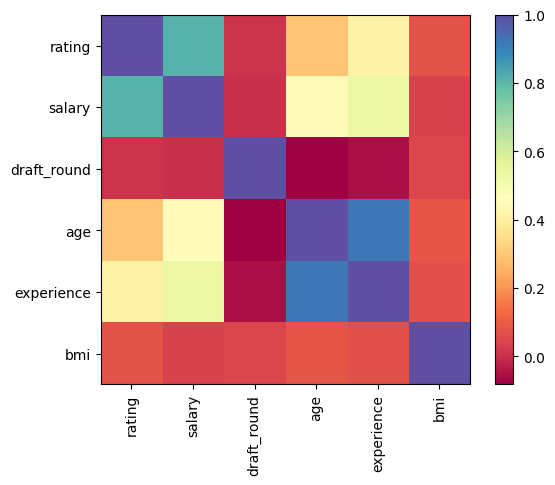

In [5]:
from matplotlib import pyplot as plt

display(df.corr())

plt.imshow(df.corr(), cmap="Spectral")
plt.yticks(range(len(df.corr().columns)), df.corr().columns)
plt.xticks(range(len(df.corr().columns)), df.corr().columns, rotation=90)
plt.colorbar()
plt.show()

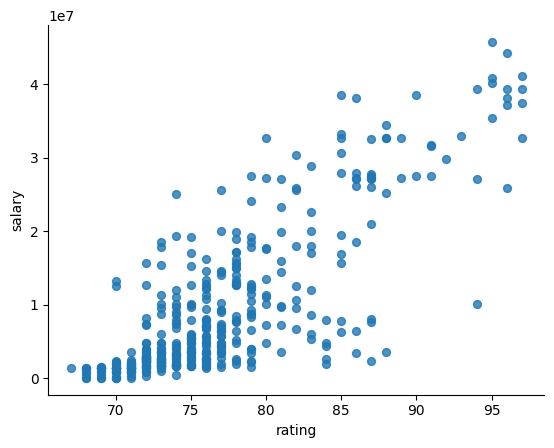

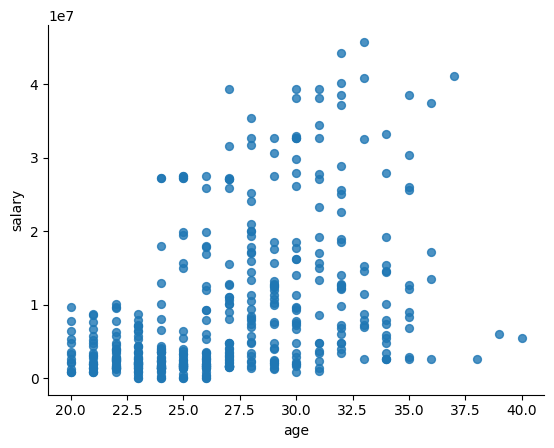

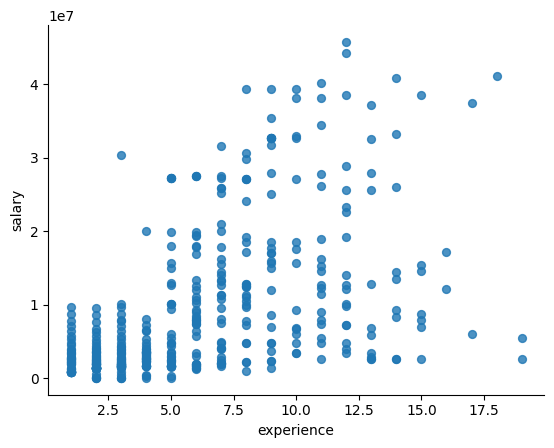

In [8]:
df.plot(kind='scatter', x='rating', y='salary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

df.plot(kind='scatter', x='age', y='salary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

df.plot(kind='scatter', x='experience', y='salary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)


In [10]:
from sklearn.model_selection import train_test_split

# definicion de variables
X = df[['rating']]
y = df['salary']

print(type(X))
print(type(y))

# subdivision de conjuntos de prueba y conrtol
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(307, 1) (132, 1) (307,) (132,)


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error as mape

## ajuste del modelo
model = LinearRegression()
model.fit(X_train, y_train)

## evaluación del modelo
y_test_pred = model.predict(X_test)
result_r2 = r2_score(y_test, y_test_pred)
result_mape = mape(y_test, y_test_pred)

## resultados
print("Coeficiente libre: ", round(model.intercept_, 5))
print("Coeficientes: ", round(model.coef_[0], 5))
print("R2: {}, MAPE: {}".format(
                        round(result_r2, 5),
                        round(result_mape, 5)))


Coeficiente libre:  -92389014.05703
Coeficientes:  1322855.14922
R2: 0.67379, MAPE: 1.20875


In [13]:
# determinar los valores minimo y maximo de la columna de datos
min_rating = df['rating'].min()
max_rating = df['rating'].max()
print(min_rating, max_rating)

# Generar una secuencia desde minimo hasta el maximo
rating_sequence = range(min_rating, max_rating+1, 1)

# Convertir la secuencia a un dataframe
seq_df = pd.DataFrame({'rating': rating_sequence})

# Visualizar el inicio de dataframe
display(seq_df.head())

seq_y = model.predict(seq_df)



67 97


,rating
0,67
1,68
2,69
3,70
4,71


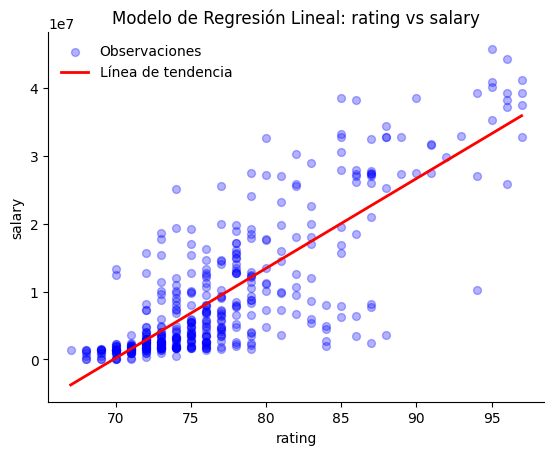

In [14]:
# Presentar grafica de puntos
plt.scatter(X, y, color='blue', label='Observaciones', s=32, alpha=.3)

# Agregar la linea de regresión
plt.plot(seq_df['rating'], seq_y, color='red', linewidth=2, label='Línea de tendencia')

plt.gca().spines[['top', 'right',]].set_visible(False)
plt.ylabel('salary');
plt.xlabel('rating');
plt.title('Modelo de Regresión Lineal: rating vs salary')
plt.legend(frameon=False, loc=2)
plt.show()